# Amazon Prime Video - Recommendation System

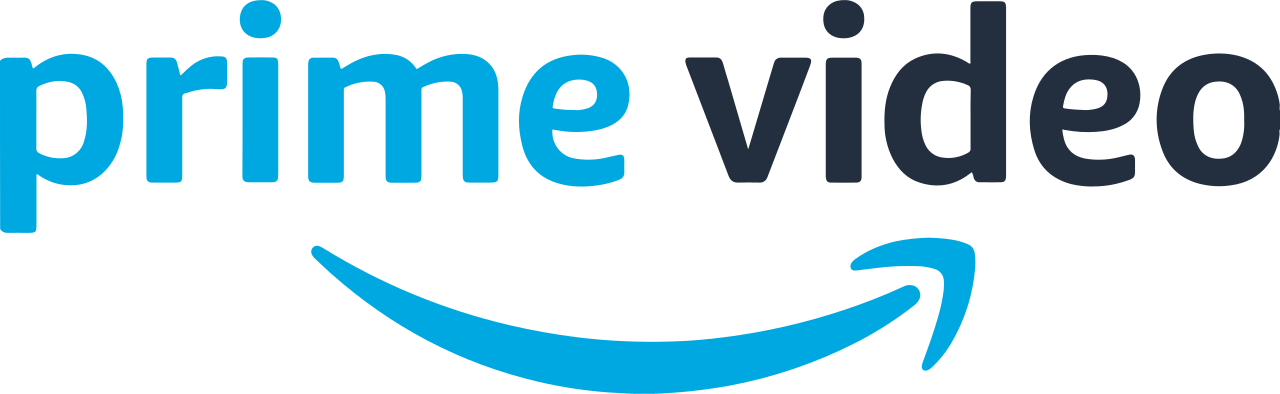

#### Author:

## Overview

## Business Understanding

## Data Understanding

This dataset was found on Kaggle - https://www.kaggle.com/datasets/victorsoeiro/amazon-prime-tv-shows-and-movies

# Imports

A little explanation of which imports I used.

In [1]:
import pandas as pd

from sklearn.impute import KNNImputer

from sklearn.model_selection import train_test_split

# Read In CSV Files

In [2]:
credits_df = pd.read_csv('../Data/credits.csv')

In [3]:
titles_df = pd.read_csv('../Data/titles.csv')

# Data Preperation

This segment will illustrate my methodology behind munging the data, getting it ready to be pre-processed for modeling.

#### Checkout Both DataFrames

In [4]:
titles_df

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9866,tm510327,Lily Is Here,MOVIE,Dallas and heroin have one thing in common: Du...,2021,NaN,93,['drama'],['US'],NaN,tt7672388,5.3,20.0,1.406,NaN
9867,tm1079144,Jay Nog: Something from Nothing,MOVIE,Something From Nothing takes you on a stand-up...,2021,NaN,55,['comedy'],['US'],NaN,tt15041600,NaN,NaN,0.600,NaN
9868,tm847725,Chasing,MOVIE,A cop from Chennai sets out to nab a dreaded d...,2021,NaN,116,['crime'],['IN'],NaN,NaN,NaN,NaN,1.960,NaN
9869,tm1054116,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,"['family', 'drama']",[],NaN,tt14331982,8.4,49.0,0.645,NaN


In [5]:
# Looking at titles DataFrame
titles_df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6


In [6]:
# Looking at the value counts of title_df
titles_df['title'].value_counts()

Dynamite                         3
The Lost World                   3
Cinderella                       3
The Hound of the Baskervilles    3
Mind Games                       3
                                ..
McCanick                         1
The Lazarus Effect               1
Marshall's Miracle               1
Blue moon                        1
Crossing Hennessy                1
Name: title, Length: 9737, dtype: int64

In [7]:
# Looking at the titles
titles_df['title']

0                     The Three Stooges
1                           The General
2           The Best Years of Our Lives
3                       His Girl Friday
4                     In a Lonely Place
                     ...               
9866                       Lily Is Here
9867    Jay Nog: Something from Nothing
9868                            Chasing
9869                           Baikunth
9870                   Waking Up Eighty
Name: title, Length: 9871, dtype: object

In [8]:
titles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtypes: float64(5), int64(

There are a total of 9,871 rows in this DataFrame

In [9]:
# Check for any null values in the DataFrame
titles_df.isna().sum()

id                         0
title                      0
type                       0
description              119
release_year               0
age_certification       6487
runtime                    0
genres                     0
production_countries       0
seasons                 8514
imdb_id                  667
imdb_score              1021
imdb_votes              1031
tmdb_popularity          547
tmdb_score              2082
dtype: int64

As you can see the `title` column does not have any null values making it easier to predict which titles I can recommend. My predictor feature `genres` also does not have any null values therefore, I will use these two features to create my MVP models and base my recommendations.  If time premits, I will incorporate some rating scores such as `imdb_score` and/or `tmdb_popularity`.

In [10]:
# Check to see if there are any duplicated movie titles

titles_df['title'].duplicated().sum()

134

In [11]:
# Drop all of the duplicated movie titles

titles_df.drop_duplicates(subset='title', inplace=True)

In [12]:
# Sanity check to ensure all duplicated movie titles were dropped

titles_df['title'].duplicated().sum()

0

In [13]:
# Looking at Credits DataFrame
credits_df.head()

,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR


In [14]:
# Check the shape of the credits_df DataFrame
credits_df.shape

(124235, 5)

In [15]:
# Check for any null values in the DataFrame
credits_df.isna().sum()

person_id        0
id               0
name             0
character    16287
role             0
dtype: int64

In [16]:
credits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124235 entries, 0 to 124234
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   person_id  124235 non-null  int64 
 1   id         124235 non-null  object
 2   name       124235 non-null  object
 3   character  107948 non-null  object
 4   role       124235 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.7+ MB


### Merge DataFrames

After taking a look at both the `titles_df` and `credits_df` it is clear that I will have to merge both of these dataframes together.  I am merging on `id` which is the movie/show title on JustWatch.  Ideally, I would like to create a recommendation system that will include and allow someone to choose a director as one of the inputs to receive recommendations based off of. Additional inputs would include being able to receive recommendations based off of `genres` or `imdb_score`.

In [17]:
# Merge both title and credit dataframes together

movies_df = titles_df.merge(credits_df, on='id', how='outer')

In [18]:
# Sanity check to ensure the merge was successful
movies_df

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934.0,TV-PG,19.0,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,59401.0,Joe Besser,Joe,ACTOR
1,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934.0,TV-PG,19.0,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,31460.0,Moe Howard,Moe,ACTOR
2,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934.0,TV-PG,19.0,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,31461.0,Larry Fine,Larry,ACTOR
3,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926.0,NaN,78.0,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0,21174.0,Buster Keaton,Johnny Gray,ACTOR
4,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926.0,NaN,78.0,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0,28713.0,Marion Mack,Annabelle Lee,ACTOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125224,tm1038144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1962387.0,Kirbi Simon,Kirbi,ACTOR
125225,tm1038144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,795241.0,Scott Lane,Scott,ACTOR
125226,tm1038144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1026818.0,Luke Walker,NaN,DIRECTOR
125227,tm1038144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1962569.0,Kandi Thompson,NaN,DIRECTOR


In [19]:
# Take a look at all the columns after merge
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125229 entries, 0 to 125228
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    125229 non-null  object 
 1   title                 123483 non-null  object 
 2   type                  123483 non-null  object 
 3   description           123295 non-null  object 
 4   release_year          123483 non-null  float64
 5   age_certification     55959 non-null   object 
 6   runtime               123483 non-null  float64
 7   genres                123483 non-null  object 
 8   production_countries  123483 non-null  object 
 9   seasons               8387 non-null    float64
 10  imdb_id               118345 non-null  object 
 11  imdb_score            117376 non-null  float64
 12  imdb_votes            117347 non-null  float64
 13  tmdb_popularity       122936 non-null  float64
 14  tmdb_score            112565 non-null  float64
 15  

In [20]:
# Take a look at all the null values in the combined dataframe
movies_df.isna().sum()

id                           0
title                     1746
type                      1746
description               1934
release_year              1746
age_certification        69270
runtime                   1746
genres                    1746
production_countries      1746
seasons                 116842
imdb_id                   6884
imdb_score                7853
imdb_votes                7882
tmdb_popularity           2293
tmdb_score               12664
person_id                  994
name                       994
character                17281
role                       994
dtype: int64

### Drop irrelevant columns as well as columns that have too many null values

Since `age_certification` has about 70k null values, that will be the first column I drop.  Next, the number of `seasons` has over 100k in null values which will make it difficult to compare that with any other column in the dataframe.  

Since I would like to recommend `title` of movies, what `type` they are (whether it is a TV Show or Movie), the `release_year` of each title, `runtime`, `genres`, and `imdb_score` would all be either input or outputs for my recommendation system - these columns will remain in the dataframe.  

However, `description`, `age_certification` (due to 70k null values), `production_countries` (because I believe this is irrelevant to my recommendation system), as well as the following columns will all be removed: `imdb_id`, `imdb_votes`, `tmdb_popularity`, `tmdb_score`, `person_id`, and `character`.

In [21]:
movies_df = movies_df.drop(['description',
                'age_certification',
                'production_countries',
                'seasons',
                'imdb_id',
                'imdb_votes',
                'tmdb_popularity',
                'tmdb_score',
                'person_id',
                'character'], axis=1)

In [22]:
# Check dataframe to see if columns were dropped
movies_df.head()

,id,title,type,release_year,runtime,genres,imdb_score,name,role
0,ts20945,The Three Stooges,SHOW,1934.0,19.0,"['comedy', 'family', 'animation', 'action', 'f...",8.6,Joe Besser,ACTOR
1,ts20945,The Three Stooges,SHOW,1934.0,19.0,"['comedy', 'family', 'animation', 'action', 'f...",8.6,Moe Howard,ACTOR
2,ts20945,The Three Stooges,SHOW,1934.0,19.0,"['comedy', 'family', 'animation', 'action', 'f...",8.6,Larry Fine,ACTOR
3,tm19248,The General,MOVIE,1926.0,78.0,"['action', 'drama', 'war', 'western', 'comedy'...",8.2,Buster Keaton,ACTOR
4,tm19248,The General,MOVIE,1926.0,78.0,"['action', 'drama', 'war', 'western', 'comedy'...",8.2,Marion Mack,ACTOR


In [38]:
# Check the columns and feature types
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122237 entries, 0 to 123481
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            122237 non-null  object 
 1   title         122237 non-null  object 
 2   type          122237 non-null  object 
 3   release_year  122237 non-null  float64
 4   runtime       122237 non-null  float64
 5   genres        122237 non-null  object 
 6   imdb_score    116446 non-null  float64
 7   name          122237 non-null  object 
 8   role          122237 non-null  object 
dtypes: float64(3), object(6)
memory usage: 9.3+ MB


In [24]:
# Check for null values after the columns were dropped
movies_df.isna().sum()

id                 0
title           1746
type            1746
release_year    1746
runtime         1746
genres          1746
imdb_score      7853
name             994
role             994
dtype: int64

### Drop Null Values

Since `title`, `type`, `release_year`, `runtime`, `genres` only have 1,746 null values and `name` and `role` with 994 null values - I am going to drop those values from the dataset.  However, `imdb_score` has a higher null value count with 7,853 - I will have to apply an imputer of some kind to deal with these null values.  I am most likely going to apply a KNN imputer to fill the null values with a more representative value.

In [25]:
movies_df = movies_df.dropna(axis=0, subset=['title','type','release_year','runtime','genres','name','role'])

In [26]:
# Check to ensure nulls are dropped from the correct columns, imdb_score should remain intact
movies_df.isna().sum()

id                 0
title              0
type               0
release_year       0
runtime            0
genres             0
imdb_score      5795
name               0
role               0
dtype: int64

In [27]:
# Checking the shape of my dataframe
movies_df.shape

(122489, 9)

**Note:** the `imdb_score` null values were *not* dropped because I feel that 5,795 values are significant enough to keep in the data to show the full picture of this dataset.  Therefore, I will be imputing the null values in this column within the pre-processing section.

### Check For and Drop Duplicates

In [28]:
# Check dataframe for duplicates
movies_df.duplicated().sum()

252

In [29]:
# Take a look at which items are duplicated
movies_df[movies_df.duplicated()]

,id,title,type,release_year,runtime,genres,imdb_score,name,role
1705,tm77319,Santa Fe Trail,MOVIE,1940.0,110.0,"['western', 'war', 'drama', 'history', 'romance']",6.2,Jack Deery,ACTOR
1872,tm4525,He Walked by Night,MOVIE,1949.0,79.0,"['thriller', 'crime']",7.1,Thomas Browne Henry,ACTOR
4424,tm73200,Li'l Abner,MOVIE,1940.0,78.0,"['comedy', 'romance']",4.9,Buster Keaton,ACTOR
6049,tm85300,Outlaws of the Desert,MOVIE,1941.0,66.0,"['western', 'action']",5.8,Bill Nestell,ACTOR
6220,tm54261,Indiscreet,MOVIE,1931.0,92.0,"['drama', 'romance', 'comedy']",6.2,Sam Lufkin,ACTOR
...,...,...,...,...,...,...,...,...,...
121107,tm1103576,Bhramam,MOVIE,2021.0,152.0,"['thriller', 'crime']",5.7,Shine Tom Chacko,ACTOR
121672,tm1043367,Open Your Eyes,MOVIE,2021.0,99.0,"['horror', 'thriller', 'drama']",4.2,Suzy Giannakopoulos,ACTOR
121742,tm1104220,My Best Worst Adventure,MOVIE,2021.0,85.0,[],7.8,Claudia Templeton,ACTOR
122740,tm1040662,Eternity,MOVIE,2021.0,45.0,['drama'],NaN,Crystal Jones,ACTOR


In [30]:
# Checking one unique value to determine if there are actual duplicates
movies_df[(movies_df['id'] == 'tm54261') & (movies_df['name'] == 'Sam Lufkin') ]

,id,title,type,release_year,runtime,genres,imdb_score,name,role
6219,tm54261,Indiscreet,MOVIE,1931.0,92.0,"['drama', 'romance', 'comedy']",6.2,Sam Lufkin,ACTOR
6220,tm54261,Indiscreet,MOVIE,1931.0,92.0,"['drama', 'romance', 'comedy']",6.2,Sam Lufkin,ACTOR


I wanted to double check this because some movies may have multiple actors within the `role` column for the same `title` of movie.  It appears that the 252 duplicates are *actually* dupicated values, therefore, I will be dropping *all* 252 duplicates.    

In [31]:
# Dropping all of the duplicated values
movies_df = movies_df.drop_duplicates()

In [32]:
# Checking to ensure all duplicated items have been removed
movies_df.duplicated().sum()

0

In [33]:
# Rechecking the shape of my dataframe
movies_df.shape

(122237, 9)

### Reformat `genres` Column

I chose to reformat the `genres` column so that it would be easier for a user to select genres when looking for recommendations.

In [34]:
# Take a look at movies_df to determine which characters I want to remove from genres column
movies_df.head()

,id,title,type,release_year,runtime,genres,imdb_score,name,role
0,ts20945,The Three Stooges,SHOW,1934.0,19.0,"['comedy', 'family', 'animation', 'action', 'f...",8.6,Joe Besser,ACTOR
1,ts20945,The Three Stooges,SHOW,1934.0,19.0,"['comedy', 'family', 'animation', 'action', 'f...",8.6,Moe Howard,ACTOR
2,ts20945,The Three Stooges,SHOW,1934.0,19.0,"['comedy', 'family', 'animation', 'action', 'f...",8.6,Larry Fine,ACTOR
3,tm19248,The General,MOVIE,1926.0,78.0,"['action', 'drama', 'war', 'western', 'comedy'...",8.2,Buster Keaton,ACTOR
4,tm19248,The General,MOVIE,1926.0,78.0,"['action', 'drama', 'war', 'western', 'comedy'...",8.2,Marion Mack,ACTOR


I used the `.replace` method and chained them together in *one* list comprehension to remove all of the unnecessary characters from the `genres` column.  (Having one list comprehension makes for easier readability)

In [35]:
movies_df['genres']=[row.strip().replace('[','').replace("'",'').replace(']','') for row in movies_df['genres']]

In [36]:
movies_df.head()

,id,title,type,release_year,runtime,genres,imdb_score,name,role
0,ts20945,The Three Stooges,SHOW,1934.0,19.0,"comedy, family, animation, action, fantasy, ho...",8.6,Joe Besser,ACTOR
1,ts20945,The Three Stooges,SHOW,1934.0,19.0,"comedy, family, animation, action, fantasy, ho...",8.6,Moe Howard,ACTOR
2,ts20945,The Three Stooges,SHOW,1934.0,19.0,"comedy, family, animation, action, fantasy, ho...",8.6,Larry Fine,ACTOR
3,tm19248,The General,MOVIE,1926.0,78.0,"action, drama, war, western, comedy, european",8.2,Buster Keaton,ACTOR
4,tm19248,The General,MOVIE,1926.0,78.0,"action, drama, war, western, comedy, european",8.2,Marion Mack,ACTOR


Since I am creating a **content-based recommendation system**, I have created a dataframe which will represent the *important characteristics* of each movie.  Since each movie will represent an item in a profile, then its actors, director, release year, runtime, genre, along with the IMDB score represent the significant features of that movie.  

## Need to work on:

- Each movie or show have to be in one row (unique) - with each name of the actor/director as a separate column.
- Probably create a new column with ONLY directors in it (limit to one director per movie)
- Genres: figure out how to bin genres into smaller subsets that include larger groups of movie 
    - potentially OHE genres out
    - every single genre is going to be its own column (1's and 0's)
        - figure out each unique genre (single genre)
        - create a new column for each genre 
        - then loop through dataframe, then place a 1 or 0 for whether or not that movie is in that genre

# Data Preprocessing 

### Train Test Split

Since this is a recommendation system, which is an *unsupervised* training method, the `train_test_split` will not include an X or y value.

In [37]:
# train, test = train_test_split(movies_df, random_state=42)

#### Workflow
- Train test split
- Impute 
- MinMaxScale 
- Use Surprise
    - run model

### Impute The `imdb_score` Null Values

Due to univariate methods (such as `SimpleImpute`) used for imputing missing values is a very simple way of estimating values (using mean, median, most-frequent), I do not feel this method is appropriate for answering my overall business problem.  For this reason, I have decided to use the `KNNImputer` since it helps to impute missing values present in the observations by finding the nearest neighbors with the Euclidean distance matrix. 

- `KNNImputer` documentation found [here](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html)
- Further explanation found [here](https://www.analyticsvidhya.com/blog/2020/07/knnimputer-a-robust-way-to-impute-missing-values-using-scikit-learn/)

# Modeling

### Baseline/Dummy Model

### KNNBasics

### KNN Cross Validation

### SVD

### NMF

### Model Performance

### Final Model Evaluation

# Deployment

# Recommendations

# App Deployment

# Next Steps